<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#LQ-Life-cycle-accumulation" data-toc-modified-id="LQ-Life-cycle-accumulation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LQ Life-cycle accumulation</a></span><ul class="toc-item"><li><span><a href="#From-sequence-to-recursive-problem" data-toc-modified-id="From-sequence-to-recursive-problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>From sequence to recursive problem</a></span></li><li><span><a href="#Backward-induction" data-toc-modified-id="Backward-induction-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Backward induction</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Implementation</a></span></li><li><span><a href="#Numerical-example" data-toc-modified-id="Numerical-example-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Numerical example</a></span><ul class="toc-item"><li><span><a href="#Analyzing-and-visualizing-optimal-plan" data-toc-modified-id="Analyzing-and-visualizing-optimal-plan-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Analyzing and visualizing optimal plan</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Postscript" data-toc-modified-id="Postscript-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Postscript</a></span></li></ul></li></ul></div>

Preparado por [MachinaFantasma](https://phantomachine.github.io/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

%matplotlib inline

'*I remember the econometrics class that Tom taught. He said, "In this course, we’re going to use
a lot of linear and quadratic methods. I know many people think that’s not high-tech, but it put
people on the moon, and that’s good enough for me*."'

[Ellen McGrattan](http://users.econ.umn.edu/~erm/), interview with S. Bowmaker in [*The Art and Practice of Economic Research*](https://t.co/gO1GRkAFC5?amp=1)

# LQ Life-cycle accumulation

This is an example of a life-cycle, optimal accumulation problem. 

By restricting to linear constraints and quadratic objective we have a very tractable class of optimal decision rules that are linear in the state variables.


Consider a consumer who ranks sequences of consumption outcomes $\{c_{t}\}_{t=0}^{T}$ according to this preference function:
\begin{equation}
	\sum_{t=0}^{T} \beta^{t} U(C_{t}) + \beta^{T+1}V_{T+1}(a_{T+1}),
    \label{eq: total payoff}
\end{equation}
where the per-period utility of consumption is
\begin{equation}
	U(C_{t} ) = -(C_{t}  - c^{\star})^{2}.
    \label{eq: flow payoff}
\end{equation}


The consumer seeks the maximal total payoff by varying her length-$(T+1)$ consumption sequence (plan).

Assume that $V_{T+1}(a_{T+1}) = -k(a_{T+1})^{2}$, where $k \geq 0$ is some arbitrarily large number. 

This has an interpretation of a (quadratic) cost of bequething assets post mortem.



Let us assume that
\begin{equation}
    y_{t} = \bar{y} + \kappa_{1} t + \kappa_{2} t^{\kappa_{3}},
\label{eq: income process}
\end{equation}
where the parameters $(\kappa_{1}, \kappa_{3} )$ are all strictly positive, $\bar{y} \geq 0$ and $\kappa_{2} < 0$.

We'll set $\kappa_{3} = 2$.

**Remark**.

* Setting $k \geq 0$ is a useful device in life-cycle modelling for rationalizing positive and large amounts of assets held by retirees or people at the end of their life (see, e.g., Mariacristina de Nardi [here](http://darp.lse.ac.uk/papersdb/DeNardi_(REStud04).pdf) and [here](https://www.sciencedirect.com/science/article/pii/S0014292114001287).) 

    * This has the interpretation of a "warm-glow" bequest motive of the consumer: She or he derives payoff from leaving assets behind (i.e., bequest to an offspring).
    
    * The modelling trick here has a quantitative motive: It helps fit the end point of age-asset profile in life-cycle data better.

* Note, if $k\rightarrow \infty$, then we are back to something similar to our selfish consumer who has no incentive to leave resources behind after their die.



The parameter $c^{\star} \in (0, \infty)$ is an ideal, reference consumption point. The consumer discounts per period payoffs by discount factor $\beta^{t} \in (0,1]$. The consumer faces a sequence of budget constraints:
\begin{equation}
    a_{t+1} + C_{t} = Ra_{t} + y_{t}, \qquad t =0,1, ..., T,
\label{eq: sbc}
\end{equation}
where $a_{t}$ is the consumer's asset position (positive/negative denotes saving/borrowing), $R > 1$ is some given gross return on the asset, and, $y_{t}$ is income-endowment. 

**Solution**.

Combining \eqref{eq: sbc} and \eqref{eq: income process} we have the sequence of budget constraints as
\begin{equation}
    a_{t+1} = Ra_{t} + (\bar{y} + \kappa_{1} t + \kappa_{2} t^{\kappa_{3}}) - (C_{t} - c^{\star}) - c^{\star}.
\label{eq: sbc2}
\end{equation}

Given a choice outcome $C_{t} = c$, \eqref{eq: sbc2} tells us that next period's asset outcome is conditional on state vector $x_{t} = (1, t, t^{\kappa_{3}}, a_{t})$. Now when next period eventuates, the form of this problem repeats itself. Again, in next period, if the consumer takes another action $C_{t+1} = c'$, the continuation asset into $t+2$ depends again on state vector $x_{t+1}$. So on and so forth. Hence, a sufficient statistic about the location or position of the decision problem at the start of each date $t$ is the vector $x_{t}$.

If $\kappa_{3} = 2$, then we have $(t+1)^{2} = 1 + 2t + t^{2}$.

**Note**: You could do all this below using scalar algebra and calculus. But we'll set things up more generally as a linear-quadratic program.

Give the grey suits in the creative department of your brain a call. They'll be able to see that \eqref{eq: sbc2} can also be written out as a system of linear equations and hence a recursion:
\begin{equation*}
    \begin{split}
        1         &= 1              
        \\
        (t+1)     &= 1 + (t)            
        \\
        (t+1)^{2} &= 1 + 2 \times (t) + 1 \times (t)^{2} 
        \\
        a_{t+1}   &= (\bar{y}-c^{\star}) \times 1 
                        + \kappa_{1} \times (t) 
                        + \kappa_{2} \times (t)^{2} 
                    + R \times a_{t}.
    \end{split}
\end{equation*}

If you existed in 1999, then you'd know to take the red pill, and enter this in matrix form:
\begin{equation}
    \left[
        \begin{matrix}
        1 \\ t+1 \\ (t+1)^{2} \\ a_{t+1} 
        \end{matrix}
    \right] =
    \left[
        \begin{matrix}
        1 & 0 & 0 & 0 \\
        1 & 1 & 0 & 0 \\
        1 & 2 & 1 & 0 \\
        \bar{y}-c^{\star} & \kappa_{1} & \kappa_{2} & R
        \end{matrix}
    \right]
    \left[
        \begin{matrix}
        1 \\ t \\ t^{2} \\ a_{t} 
        \end{matrix}
    \right]
    +
    \left[
        \begin{matrix}
        0 \\ 0 \\ 0 \\ -1
        \end{matrix}
    \right]
    (C_{t} - c^{\star}).
    \label{eq: sbc-sspace}
\end{equation}

**Fast takeaway**. 

1. We have just shown that we can re-write the controllable, non-homogeneous scalar difference equation \eqref{eq: sbc2} in a state-space form:
    \begin{equation}
        x_{t+1} = Ax_{t} + Bu_{t};
        \label{eq: sbc3-sspace}
    \end{equation}
   where $u_{t}$ is our control variable.
   
2. Observe that the objective function \eqref{eq: total payoff}, given assumption \eqref{eq: flow payoff}, is quadratic. The constraints \eqref{eq: sbc-sspace}, for each date $t$, are linear.


## From sequence to recursive problem

**Claim**. Bellman's principle of optimality allows us to rewrite this decision problem as:
\begin{equation}
    %\begin{split}
    W_{t} (x_{t}) =
    \min_{u_{t}} \left\{
                x_{t}^{\text{T}} Q x_{t}
                + u_{t}^{\text{T}} R u_{t}
                + 2 u_{t}^{\text{T}} S x_{t}
                + \beta W_{t+1} (x_{t+1})
        :
        %\right.
        %\\
        %&
        %\left.
        x_{t+1} = Ax_{t} + Bu_{t}
        \right\}
    %\end{split}
    \label{eq: bellman-lqdp}
\end{equation}
and for the terminal valuation, we have 
\begin{equation}
    W_{T+1}(x_{T+1}) = x_{T+1}^{\text{T}}P_{T+1}x_{T+1} \equiv V_{T+1}(a_{T+1}).
\end{equation}

Can you prove this?

Eat your greens and do your linear algebra. Then you'll see that:
\begin{equation*}
    Q = \left[
            \begin{matrix}
            0 & 0 & 0 & 0 \\
            0 & 0 & 0 & 0 \\
            0 & 0 & 0 & 0 \\
            0 & 0 & 0 & 0
            \end{matrix}
        \right],
        \
    R = 1, 
        \
    S = \left[
            \begin{matrix}
            0 & 0 & 0 & 0 
            \end{matrix}
        \right],
        \
    P_{T+1} = \left[
            \begin{matrix}
            0 & 0 & 0 & 0 \\
            0 & 0 & 0 & 0 \\
            0 & 0 & 0 & 0 \\
            0 & 0 & 0 & k
            \end{matrix}
        \right].
\end{equation*}

## Backward induction 

**Stage $t = T$**: We have $W_{T+1}(x_{T+1}) = x_{T+1}^{\text{T}}P_{T+1} x_{T+1}$. 

So Bellman's equation \eqref{eq: bellman-lqdp} at this stage is
\begin{equation}
    W_{T} (x_{T}) =
    \min_{u_{T}} 
        \left\{
                x_{T}^{\text{T}} Q x_{T}
                + u_{T}^{\text{T}} R u_{T}
                + 2 u_{T}^{\text{T}} S x_{T}
                + \beta (Ax_{T} + Bu_{T})^{\text{T}}P_{T+1} (Ax_{T} + Bu_{T})
        \right\}
    \label{eq: bellman-T}
\end{equation}

The minimizer is 
\begin{equation}
    u_{T}^{\ast} = F_{T} x_{T},
    \label{eq: regulator-T}
\end{equation}
where $F_{T} = −(R + \beta B^{\text{T}}P_{T+1}B)^{-1}(\beta B^{\text{T}}P_{T+1}A + S)$.

What is the value of this optimal response?

Plug minimizer \eqref{eq: regulator-T} into the objective function on the RHS of \eqref{eq: bellman-T} to get
\begin{equation}
W_{T}(x_{T}) = x_{T}^{\text{T}}P_{T}x_{T}.
\label{value-T}
\end{equation}
where
\begin{equation}
P_{T} = Q−(\beta B^{\text{T}} P_{T+1} A  + S)^{\text{T}}(R+ \beta B^{\text{T}}P_{T+1}B)^{-1}(\beta B^{\text{T}} P_{T+1} A  + S)+\beta A^{\text{T}}P_{T+1}A.
\label{value-T2}
\end{equation}

Notice how this value function is also a quadratic form?

If we can find the fixed point $P_{T}$ satisfying \eqref{value-T2}, then we can compute value function $W_{T}$.

Now step back by one stage.

By induction, you can show that for each

**Stage $t = T, T-1, ..., 0$**: Given $W_{t+1}(x_{t+1}) = x_{t+1}^{\text{T}}P_{t+1}x_{t+1}$, we have
\begin{equation}
    W_{t} (x_{t}) =
    \min_{u_{t}} 
        \left\{
                x_{t}^{\text{T}} Q x_{t}
                + u_{t}^{\text{T}} R u_{t}
                + 2 u_{t}^{\text{T}} S x_{t}
                + \beta (Ax_{t} + Bu_{t})^{\text{T}}P_{t+1} (Ax_{t} + Bu_{t})
        \right\}.
    \label{eq: bellman-t}
\end{equation}

The optimal regulator (i.e., the minimizer) is a time-varying, linear function of the state vector: 
\begin{equation}
    u_{t}^{\ast} = F_{t} x_{t},
    \label{eq: regulator-t}
\end{equation}
where $F_{t} = −(R + \beta B^{\text{T}}P_{t+1}B)^{-1} (\beta B^{\text{T}}P_{t+1}A + S)$.

What is the value of this optimal response?

Plug minimizer \eqref{eq: regulator-T} into the objective function on the RHS of \eqref{eq: bellman-t} to get
\begin{equation}
W_{t}(x_{t}) = x_{t}^{\text{T}}P_{t}x_{t},
\label{value-t}
\end{equation}
where
\begin{equation}
P_{t} = Q−(\beta B^{\text{T}} P_{t+1} A  + S)^{\text{T}}(R+ \beta B^{\text{T}}P_{t+1}B)^{-1}(\beta B^{\text{T}} P_{t+1} A  + S)+\beta A^{\text{T}}P_{t+1}A.
\label{value-t2}
\end{equation}

Notice the recursivity of the form now?

If we can calculate $P_{t}$ satisfying \eqref{value-T2}, then we can compute value function $W_{t}$.

### Summary

Given terminal period payoff function indexed by $P_{T+1}$ (which we know), we can solve by backward induction using the recursion \eqref{value-t2} and \eqref{eq: regulator-t}.

This yields a sequence $\{ W_{t}, h_{t}: t = T, T-1, ..., 0 \}$ of stage- and state-dependent (quadratic) value and (linear) decision functions, where each function is

* $W: \mathbb{N} \times X \rightarrow \mathbb{R}$, where $W_{t}(x_{t}) := x_{t}^{\text{T}}P_{t}x_{t}$;
* $h: \mathbb{N} \times X \rightarrow \mathbb{R}$, where $h_{t}(x_{t}) := F_{t}x_{t}$;

and $\mathbb{N} \ni t$ and $X \ni x_{t}$.

## Implementation

Here's our deterministic, quadratic-trend (non-asset) income process:

In [2]:
def y(t, ybar, κ1, κ2):
    """Exogenous and stylized hump-shaped income process
    as a function of time/age, t"""
    return ybar + κ1*t + κ2*t**2.0

Applying the optimal control $u_{t}^{\ast} = F_{t}x_{t}$ to the linear state-space model \eqref{eq: sbc3-sspace}, we have the optimal trajectory of the state vector characterized by 
\begin{equation}
    x_{t+1} = g_{t}(x_{t}) := (A + BF_{t})x_{t}.
\end{equation}

We code this up as:

In [3]:
def g(x, A, B, F):
    """Optimal transition map of x under optimal
    regulator: u(t) = F(t)x(t)"""
    x_next = (A + B@F)@x
    return x_next

This implements the matrix Riccatti recursion we saw in \eqref{value-t2}:

In [4]:
def riccatti(P_next, β, A, B, Q, R, S):
    """Riccatti equation: A matrix-quadratic recursion.
    Given continuation value P_{t+1}, get P_{t} and F_{t}.
    Note: If A is a stable matrix, there is a unique long-run P!"""
    cov = R + β*(B.T)@(P_next@B)
    Z = β*(B.T)@(P_next@A) + S
    # (-ve) of policy function
    F = linalg.solve(cov, Z)    # A@x = B, x = np.linalg.inv(A)@B
    # Value function (quadratic)
    P = Q - (Z.T)@F + β*(A.T)@(P_next@A)
    return P, -F

**An aside**. For the reader familiar with the [Kalman filter](https://medium.com/analytics-vidhya/the-kalman-filter-intuition-history-and-mathematical-derivation-64abf87bf7c9), you will see a similar recursion derived in the Kalman optimal projection problem. The Kalman filter is often used in forward projections or backward smoothing in linear, Gaussian hidden Markov models of time-series statistics. This was originally stuff designed for rocket science and the research was financed by the U.S. Air Force in the 1950s.

Now, our backward-induction algorithm:

In [5]:
def lq_backsolve(T, P_next, β, A, B, Q, R, S):
    """Solve finite-horizon, deterministic LQ program
    with horizon T, given DP model (β, A, B, Q, R, S)
    and terminal stage valuation quadratic matrix, P_next."""
    P_list = []
    F_list = []
    P_next = P_terminal
    for t in range(T, -1, -1):
        # Evaluate stage-t value and policy functions
        P, F = riccatti(P_next, β, A, B, Q, R, S)
        # Store these
        P_list.append(P) # P_t
        F_list.append(F) # F_t
        # Step backward again
        P_next = P
    # Sort in ascending t order
    P_list = P_list[::-1]
    F_list = F_list[::-1]
    return P_list, F_list

## Numerical example

Let's parametrize the model:

In [6]:
# Exogenous gross real return on asset
RR = 1.05
# Subjective discount factor
β = 1/RR
# Life-cycle horizon
T = 44
# Ideal consumption level
cstar = 2.0
# Warm-glow scale (cost)
k = 1e6
# Exogenous income process/trend
ybar = 0.0                    # intercept coeff
κ1 = (T)/((T)/2.0)**2.0           # linear trend coeff
κ2 = -1.0/((T)/2.0)**2.0        # quadratic trend coeff

Here's a peek at our deterministic (non-asset) income path of the consumer's lifecycle:

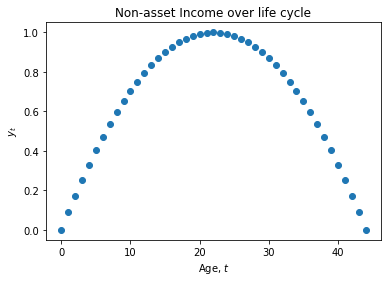

In [7]:
plt.figure()
t_range = np.arange(T+1)
y_range = y(t_range, ybar, κ1, κ2)
plt.plot(t_range, y_range, 'o')
plt.xlabel('Age, $t$')
plt.ylabel('$y_{t}$')
plt.title('Non-asset Income over life cycle')
plt.show()

The income-age profile is an inverted-U or hump shaped path. This what is typically observed in microdata at the household level, when we sort individuals by their age groups.

Let's define the arrays making up our controllable linear state-space form \eqref{eq: sbc-sspace} of the recursive budget constraint:

In [8]:
# Linear: Constraint
A = np.array([[1.,          0.,  0., 0. ],
              [1.,          1.,  0., 0. ],
              [1.,          2.,  1., 0. ],
              [ybar-cstar,  κ1,  κ2, RR ]])

B = np.atleast_2d([0., 0., 0., -1.]).T

Now let's set up the matrices defining our objective function in \eqref{eq: bellman-lqdp}:

In [9]:
# Quadratic: Objective
Q = np.zeros((4,4))
R = 1.0
S = np.zeros((1,4))

# Terminal stage payoff function (quadratic matrix)
P_terminal = Q.copy()
P_terminal[-1,-1] = k

Pass these model elements to the backward-induction algorithm:

In [10]:
PT, FT = lq_backsolve(T, P_terminal, β, A, B, Q, R, S)

The output consists of the sequence of matrices defining the value and optimal regulation functions $\{P_{t}, F_{t}\}_{t=0}^{T} \Rightarrow \{W_{t}, h_{t}\}_{t=0}^{T}$.

### Analyzing and visualizing optimal plan

This code below starts off the decision problem with a consumer that has zero initial assets $a_{0} = 0$.

It then loops over the agent's lifetime, with age indexed by $t = 0, 1, ..., T$.

For each age/date $t$, the agent uses the optimal control rule $h_{t}$ to select her best consumption outcome as a function of the date and state.

This also induces a corresponding optimal transition in the asset level via mapping $g_{t}$.

We record the outcomes for each date $t$ using Python lists:

In [11]:
# Initial state with some positive initial asset balance
# Recall x_{t} = (1, t, t^2, a_{t})
x0 = np.atleast_2d([1., 0., 0., 0.0]).T  

# Simulate path
x = x0.copy()
asset = []
asset.append(x[-1])
consumption = []
for t in range(T):
    # Evaluate optimal transition map
    x_next = g(x, A, B, FT[t])
    # Store asset outcome
    asset.append(x_next[-1])
    # Optimal control rule: consumption outcome, store
    consumption.append(cstar + FT[t]@x)
    # Update history of state outcomes
    x = x_next
# Flatten into 1D numpy arrays
asset = np.asarray(asset).ravel()
consumption = np.asarray(consumption).ravel()

Let's visualize the age profile of the optimal consumption plan against the lifetime non-asset income:

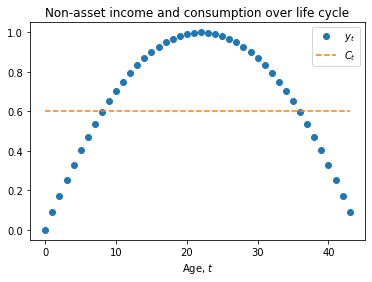

In [12]:
plt.figure()
# Non-asset income profile
t_range = np.arange(T)
y_range = y(t_range, ybar, κ1, κ2)
plt.plot(t_range, y_range, 'o', label='$y_{t}$')
# Consumption profile
plt.plot(t_range, consumption, '--', label='$C_{t}$')
plt.xlabel('Age, $t$')
plt.title('Non-asset income and consumption over life cycle')
plt.legend()
plt.show()

Her optimal consumption path is *smooth*.

**The fast-living years.** Notice how she is consuming more than her non-asset income each period for some initial years?

That means she must be borrowing. 

**Mid-life saving**. But her sequence of budget constraints must add up to imply a solvent intertemporal saving/borrowing-consumption plan. (Do the algebra and you can show this argument!) So she would have to start saving around middle age. This saving is optimally spread to cover dissaving in the initial and the latter years.


**Twilight is the loneliest time of day.** As she gets on in life, her income profile is falling (by assumption). We know the agent dislikes too much deviation of consumption from her ideal point $c^{\star}$. So she is optimally smoothing consumption. That means she has to dissave towards the end of her economic-actor life.

On the flipside of the consumer's budget constraint, we can also work out her asset position.

Here, we plot the path of date-$t$ *initial* asset positions.

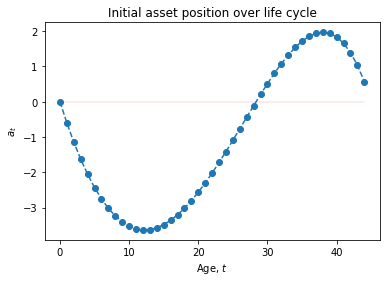

In [13]:
plt.figure()
# Asset profile
t1_range = np.arange(asset.size)
plt.plot(t1_range, asset, '--o')
plt.plot(t1_range, np.zeros(t1_range.size), '-r', alpha=0.1)
# Finer x-tick labels
# plt.xticks(t1_range)
plt.xlabel('Age, $t$')
plt.ylabel('$a_{t}$')
plt.title('Initial asset position over life cycle')
plt.show()

Now we can also verify that if $k$ is very large the terminal stage consumption is (approximately) the same as initial (non-asset plus asset) income:

In [14]:
# Terminal consumption
C_terminal = consumption[-1]

In [15]:
# Terminal income
Y_terminal = RR*asset[-1] + y(T, ybar, κ1, κ2)

So post-mortem initial asset $a_{T+1}$ is ...

In [16]:
Y_terminal - C_terminal

-1.4693191954240348e-06

### Exercise

1. Show that the terminal period optimal consumption in this model has this exact formula:
    \begin{equation*}
        C_{T} = \frac{\beta k}{1 + \beta k}
                \left( R a_{T} + y_{T} \right).
    \end{equation*}
    
2. Then show that the indirect utility at the beginning of stage $t=T$ is
    \begin{equation*}
        W_{T}(x_{T}) = \frac{\beta k}{1 + \beta k}
                \left( \bar{y} + \kappa_{1} T + \kappa_{2} T^{2} + R a_{T} \right)^{2}.
    \end{equation*}
    
3. How does your answer in the last part relate to the matrix $P_{T}$?

4. Now can you verify that if $k \rightarrow \infty$, $a_{T+1} \rightarrow 0$?

## Postscript


Additionally, if we extend this problem to include random shocks to income, for example, the solution can be viewed as a time-varying-parameter (TVP) linear, multiple-time-series stochastic process (also know as a TVP-VAR model amongst time-series econometricians).